# El tratamiento de las variables categóricas

In [322]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [323]:
df = pd.read_csv('../datasets/ecom-expense/Ecom Expense.csv')

In [324]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [325]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"],prefix="City")

In [326]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [327]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [328]:
column_names = df.columns.values
column_names

array(['Transaction ID', 'Age ', ' Items ', 'Monthly Income',
       'Transaction Time', 'Record', 'Gender', 'City Tier', 'Total Spend'],
      dtype=object)

In [329]:
df_new = df[column_names].join(dummy_gender).join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [330]:
df_new = df_new.drop(["Gender", "City Tier"], axis=1)

In [331]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,3254.160485,1,0,0,1,0


In [332]:
feature_cols = ["Monthly Income", "Transaction Time", 
                "Gender_Female", "Gender_Male", 
                "City_Tier 1", "City_Tier 2", "City_Tier 3"
                , "Record"]

In [333]:
X = df_new[feature_cols]
y = df_new["Total Spend"]

In [334]:
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [335]:
print(lm.intercept_)
print(lm.coef_)

-79.4171303013718
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [336]:
list_coef = list(zip(feature_cols, lm.coef_))
list_coef

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589634),
 ('Gender_Female', -131.02501325554624),
 ('Gender_Male', 131.02501325554607),
 ('City_Tier 1', 76.76432601049513),
 ('City_Tier 2', 55.1389743092325),
 ('City_Tier 3', -131.9033003197277),
 ('Record', 772.2334457445645)]

In [337]:
lm.score(X,y)

0.9179923586131016

El modelo puede ser escrito como:
    Total_Spend = -79.4171303013718 
        + `Monthly Income` * `0.14753898049205738`
        + `Transaction Time` *  `0.15494612549589634`
        + `Gender_Female` * `-131.02501325554624`
        + `Gender_Male` * `131.02501325554607`
        + `City_Tier 1` * `76.76432601049513`
        + `City_Tier 2` * `55.1389743092325`
        + `City_Tier 3` * `-131.9033003197277`
        + `Record` * `772.2334457445645)`
* Si es hombre y vive en CT1: Total_Spend = 128.37220896466724 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545+'Record'* 772.2334457445648
* Si es hombre y vive en CT2: Total_Spend = 106.74685726340445 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545 +'Record'* 772.2334457445648
* Si es hombre y vive en CT3: Total_Spend = -80.29541736555583 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545+'Record'* 772.2334457445648
* Si es mujer y vive en CT1: Total_Spend = -79.41713030137362 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545 - 131.0250132555456+ 76.76432601049527 +'Record'* 772.2334457445648
* Si es mujer y vive en CT2: Total_Spend = -79.41713030137362 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545 - 131.0250132555456+ 55.138974309232474 +'Record'* 772.2334457445648
* Si es mujer y vive en CT3: Total_Spend = -79.41713030137362 + 'Monthly Income' 0.14753898049205738 + 'Transaction Time' 0.15494612549589545 - 131.0250132555456-131.9033003197278 +'Record'* 772.2334457445648


In [338]:
prediction = -79.4171303013718
for i in list_coef:
    prediction += df_new[i[0]] * i[1]

In [339]:
df_new["prediction"] = prediction

In [340]:
df_new.head(20)

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,3254.160485,1,0,0,1,0,3581.980335
5,TXN006,49,6,6282,48.974268,2,2375.036467,0,1,0,1,0,2585.641997
6,TXN007,21,14,7086,961.203768,8,7494.474559,0,1,1,0,0,7500.635790
7,TXN008,58,9,8881,962.253740,10,10782.944920,0,1,0,0,1,9101.430215
8,TXN009,20,6,5635,858.328131,5,3854.277411,0,1,1,0,0,4953.916211
9,TXN010,48,12,20861,43.036737,4,5346.140262,1,0,0,1,0,6018.109661


In [341]:
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"])**2)

In [342]:
SSD

1517733985.340816

In [343]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))

In [344]:
RSE

803.1318809818165

In [345]:
sales_mean = np.mean(df_new["Total Spend"])
sales_mean

6163.176415976715

In [346]:
error = RSE/sales_mean
error*100

13.03113568029416

In [347]:
df_new["prediction_with_sklearn"] = lm.predict(pd.DataFrame(df_new[feature_cols]))

In [348]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction,prediction_with_sklearn
0,TXN001,42,10,7313,627.668127,5,4198.385084,1,0,1,0,0,4903.696720,4903.696720
1,TXN002,24,8,17747,126.904567,3,4134.976648,1,0,0,1,0,4799.434826,4799.434826
2,TXN003,47,11,22845,873.469701,2,5166.614455,0,1,0,1,0,5157.082504,5157.082504
3,TXN004,50,11,18552,380.219428,7,7784.447676,1,0,1,0,0,8068.012996,8068.012996
4,TXN005,60,2,14439,403.374223,2,3254.160485,1,0,0,1,0,3581.980335,3581.980335


# Eliminar variabes dummy redundantes

In [349]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]

In [350]:
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [351]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dummy_city_tier

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0
...,...,...
2357,1,0
2358,1,0
2359,0,1
2360,0,0


In [352]:
df_new = df[column_names].join(dummy_gender).join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [353]:
feature_cols = ["Monthly Income", "Transaction Time", 
                "Gender_Male", 
                "City_Tier 2", "City_Tier 3"
                , "Record"]

In [354]:
X = df_new[feature_cols]
y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [355]:
lm.intercept_

-133.67781754642238

In [356]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.1549461254959002),
 ('Gender_Male', 262.0500265110948),
 ('City_Tier 2', -21.62535170126276),
 ('City_Tier 3', -208.66762633022296),
 ('Record', 772.2334457445636)]

In [357]:
lm.score(X,y) # El r cuadrado es el mismo por que no cambia el modelo

0.9179923586131016

Coeficientes con todas las variables en el modelo
* ('Monthly Income', 0.14753898049205738)
* ('Transaction Time', 0.15494612549589634)
* ('Gender_Female', -131.02501325554624)
* ('Gender_Male', 131.02501325554607)
* ('City_Tier 1', 76.76432601049513)
* ('City_Tier 2', 55.1389743092325)
* ('City_Tier 3', -131.9033003197277)
* ('Record', 772.2334457445645)
Coeficientes tras enmascarar las variables dummy pertinentes
* ('Monthly Income', 0.14753898049205744)
* ('Transaction Time', 0.1549461254959002)
* ('Gender_Male', 262.0500265110948)
* ('City_Tier 2', -21.62535170126276)
* ('City_Tier 3', -208.66762633022296)
* ('Record', 772.2334457445636)

Los cambios se reflejan en

* Gender_Male:
    * antes -> 131.02,
    * después -> 262.05 = ( 131.02 - (-131.02))
* Gender_Female:
    * antes -> -131.02,
    * después -> 0
* CT1:
    * antes -> 76.76,
    * después -> 0
* CT2:
    * antes -> 55.13,
    * después -> -21.62 = (55.13 - 76.76)
* CT3:
    * antes -> -131.90,
    * después -> -208.66 = (-131.90 - 76.76)

## Transformación de variables para conseguir una relación no lineal¶

In [358]:
import pandas as pd

In [359]:
data_auto = pd.read_csv('../datasets/auto/auto-mpg.csv')
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [360]:
data_auto.shape

(406, 9)

In [361]:
import matplotlib.pylab as plt
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()

Text(0.5, 1.0, 'CV vs MPG')

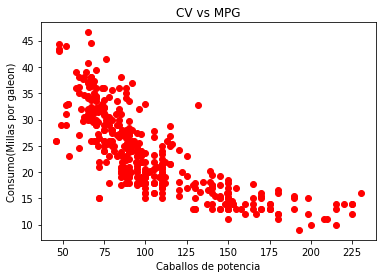

In [362]:
data_auto.shape
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de potencia")
plt.ylabel("Consumo(Millas por galeon)")
plt.title("CV vs MPG")

## Modelo de regresion lineal
* mpg = a = b * horsepower

In [363]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X_data = X[:, np.newaxis]
print(type(X))
print(type(X_data))

lm = LinearRegression()
lm.fit(X_data,y)

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0.5, 1.0, 'CV vs MPG')

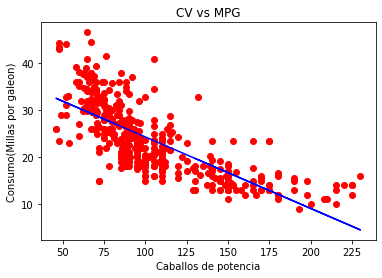

In [364]:
%matplotlib inline
plt.plot(X, y, "ro")
plt.plot(X, lm.predict(X_data), "blue")
plt.xlabel("Caballos de potencia")
plt.ylabel("Consumo(Millas por galeon)")
plt.title("CV vs MPG")

In [365]:
lm.score(X_data, y)

0.5746533406450252

In [366]:
SSD = np.sum((y - lm.predict(X_data))**2)

In [367]:
RSE = np.sqrt(SSD/len(X_data)-1)

In [368]:
y_mean = y.mean()
error = RSE/y_mean
SSD,RSE,y_mean,error*100

(10315.751960060918, 4.940471238582747, 23.514572864321607, 21.01025294862518)

## Modelo de regresion cuadratico
* mpg = a = b * horsepower^2

In [369]:
X_data = X**2
X_data = X_data[:, np.newaxis]

In [370]:
lm = LinearRegression()
lm.fit(X_data, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [371]:
lm.score(X_data, y)

0.4849887034823205

In [372]:
SSD = np.sum((y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.514572864321607, 23.616889852998113)

## Modelo de regresion lineal y cuadratico
* mpg = a = b * horsepower + c * horsepower^2

In [373]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [374]:
poly = PolynomialFeatures(degree=2)

In [375]:
X_data = poly.fit_transform(X[:, np.newaxis])

In [376]:
lm = linear_model.LinearRegression()
lm.fit(X_data, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [377]:
lm.score(X_data, y)

0.6439066584257469

In [378]:
lm.intercept_

55.02619244708036

In [379]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.02619 -0.43404318 * horsepower + 0.00112615 * horsepower^2

In [380]:
def regresion_validation(X_data, y, y_pred):
    SSD = np.sum((y - y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(y)
    error = RSE/y_mean
    print("SSD: "+str(SSD)+", RSE: " +str(RSE) + ", Y_mean: " +str(y_mean) +", error: " + str(error*100)+ "%")

for d in range(2,6):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:, np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, y)
#     print("Regresion de grado", str(d))
#     print(lm.score(X_data, y))
#     print(lm.intercept_)
#     print(lm.coef_)
    regresion_validation(X_data, y, lm.predict(X_data))

SSD: 8636.180643524502, RSE: 4.61778115803654, Y_mean: 23.514572864321607, error: 19.6379546619069%
SSD: 8622.569367428549, RSE: 4.614140736300907, Y_mean: 23.514572864321607, error: 19.622473106036683%
SSD: 8566.799832491353, RSE: 4.5991947315797574, Y_mean: 23.514572864321607, error: 19.55891250126879%
SSD: 8373.171393635388, RSE: 4.54692173544207, Y_mean: 23.514572864321607, error: 19.336612073192548%


# El problemas de los Outliers

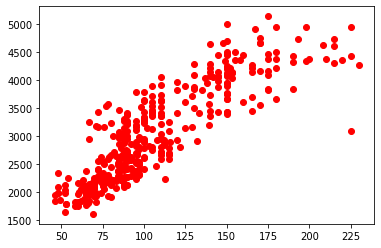

In [400]:
plt.plot(data_auto["horsepower"], data_auto["weight"], "ro")

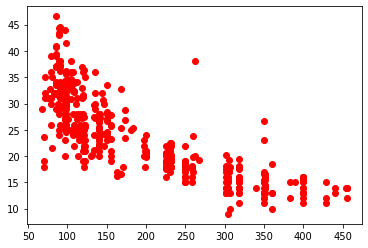

In [382]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")

In [383]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X = X[:, np.newaxis]
y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

In [384]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [385]:
lm.score(X, y)

0.6261049762826918

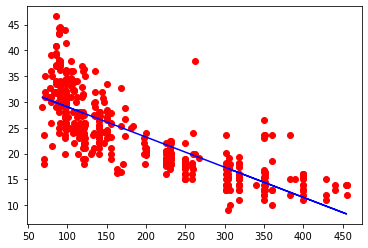

In [386]:
plt.plot(X,y, "ro")
plt.plot(X, lm.predict(X),"blue")

In [387]:
data_auto[(data_auto["displacement"]>250)&(data_auto["mpg"]>35)]


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [388]:
data_auto[(data_auto["displacement"]>300)&(data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


0.6466514317531822


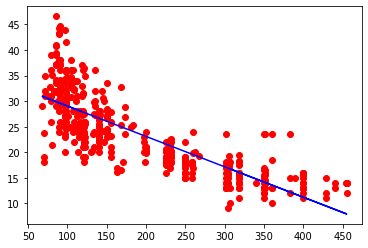

In [394]:
data_auto_clean = data_auto.drop([395, 258, 305, 372])
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X = X[:, np.newaxis]
y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())
lm = LinearRegression()
lm.fit(X, y)
print(lm.score(X, y))
plt.plot(X,y, "ro")
plt.plot(X, lm.predict(X),"blue")
